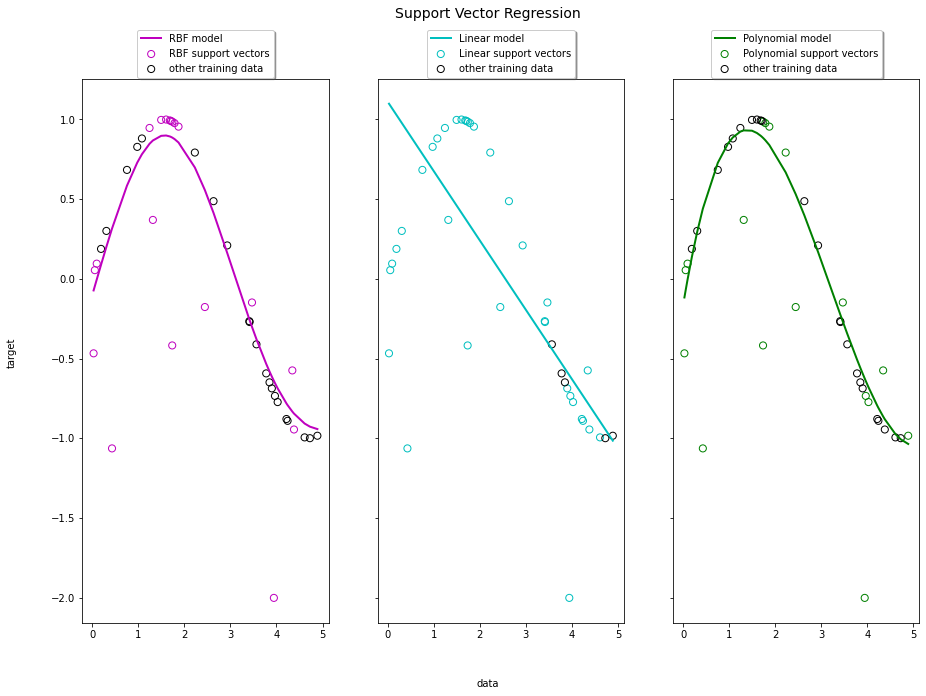

In [4]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    model = svr.fit(X, y)
    y_prediction = model.predict(X)
    axes[ix].plot(X, y_prediction, color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [7]:
X

array([[0.02736054],
       [0.05441837],
       [0.09540481],
       [0.18897007],
       [0.30528395],
       [0.42760744],
       [0.7524744 ],
       [0.97557837],
       [1.07733187],
       [1.24249351],
       [1.31531659],
       [1.49529005],
       [1.60219961],
       [1.68347415],
       [1.70670696],
       [1.73538234],
       [1.73939749],
       [1.78570092],
       [1.87217211],
       [2.22699378],
       [2.44456665],
       [2.63268667],
       [2.9304575 ],
       [3.41055075],
       [3.41609161],
       [3.46838677],
       [3.56517977],
       [3.7768687 ],
       [3.8486847 ],
       [3.89935977],
       [3.94378736],
       [3.96678578],
       [4.02556993],
       [4.21639403],
       [4.24113694],
       [4.34450278],
       [4.3802403 ],
       [4.6111378 ],
       [4.72636734],
       [4.88878871]])

In [8]:
y

array([-0.46748195,  0.05439152,  0.09526014,  0.1878474 ,  0.30056401,
       -1.06393877,  0.68344716,  0.82802631,  0.88069711,  0.94659094,
        0.36955521,  0.99715076,  0.99950696,  0.99365857,  0.99077836,
       -0.41796789,  0.98582046,  0.97699675,  0.95492901,  0.79231792,
       -0.17695946,  0.48722215,  0.20956998, -0.26572714, -0.27106469,
       -0.14834296, -0.41103318, -0.59339973, -0.64962573, -0.68730125,
       -2.00190871, -0.73467882, -0.7732669 , -0.87949564, -0.89100056,
       -0.57464306, -0.9453439 , -0.99487848, -0.9999023 , -0.98448187])

In [2]:
y.shape

(40,)

In [5]:
print(type(X))

<class 'numpy.ndarray'>


In [6]:
X.shape

(40, 1)